In [38]:
#1. Импортируйте библиотеки pandas, numpy и matplotlib.
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [41]:
#Создайте датафреймы X и y из этих данных.
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [42]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
#с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от 
#всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [43]:
#Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [44]:
#Постройте модель TSNE на тренировочный данных с параметрами: 
#n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [46]:
plt.style.use?


In [51]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

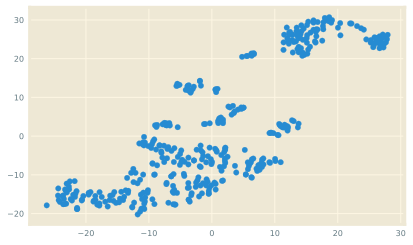

In [58]:
#Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [59]:
#2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
#используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

In [60]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [61]:
plt.scatter?


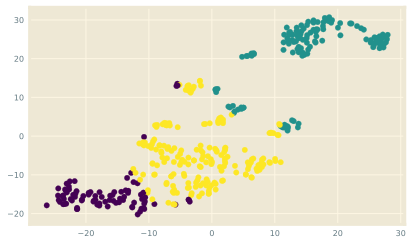

In [62]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки 
#из разных кластеров разными цветами.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [63]:
#Вычислите средние значения price и CRIM в разных кластерах.
print('Средние значения price:')

print(f'Для кластера 0: {y_train[labels_train == 0].mean()}')
print(f'Для кластера 1: {y_train[labels_train == 1].mean()}')
print(f'Для кластера 2: {y_train[labels_train == 2].mean()}')

print('Средние значения CRIM:')
      
print('Для кластера 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Для кластера 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Для кластера 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Средние значения price:
Для кластера 0: 27.78837209302326
Для кластера 1: 16.165354330708663
Для кластера 2: 24.958115183246072
Средние значения CRIM:
Для кластера 0: 0.07356558139534886
Для кластера 1: 10.797028425196853
Для кластера 2: 0.42166020942408367


In [64]:
#3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
labels_test = kmeans.predict(X_test_scaled)

In [65]:
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
print('Средние значения price:')

print(f'Для кластера 0: {y_test[labels_test == 0].mean()}')
print(f'Для кластера 1: {y_test[labels_test == 1].mean()}')
print(f'Для кластера 2: {y_test[labels_test == 2].mean()}')

print('Средние значения CRIM:')

print('Для кластера 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Для кластера 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Для кластера 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Для кластера 0: 31.35
Для кластера 1: 16.43714285714286
Для кластера 2: 21.860784313725492
Средние значения CRIM:
Для кластера 0: 0.062060000000000004
Для кластера 1: 10.165531142857143
Для кластера 2: 0.26607882352941176
